In [190]:
using Images, ImageDraw
using Colors
using FileIO
using Interpolations
using Plots

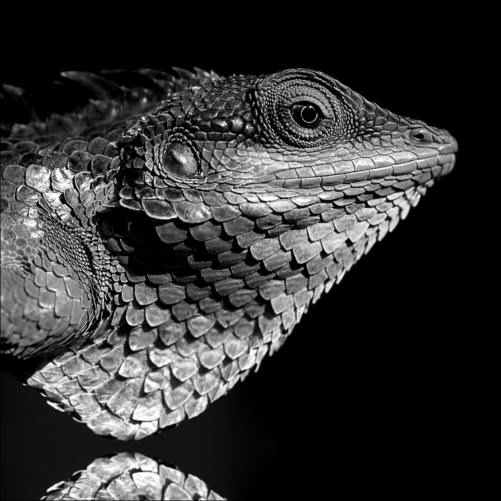

In [169]:
# specify the path to your local image file and load it:
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

# Hough transform most simple example
detecting one line:

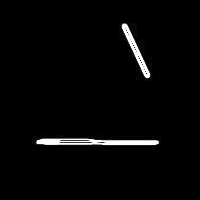

In [244]:
include("imageops.jl")
img = load("./images/input/geom2.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

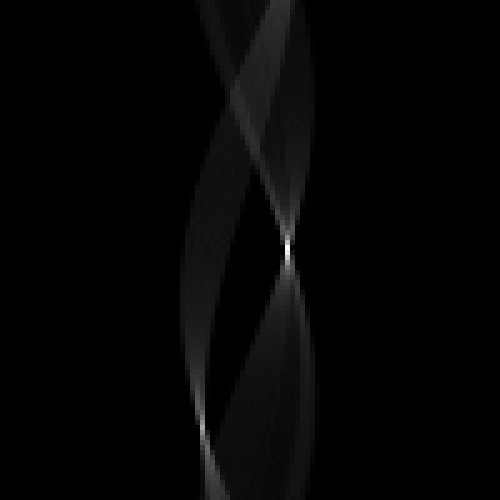

In [234]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [321]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 10, size(img))

(phi, r, m, n) = (1.6022122533307945, 48.00000011920929, 0.03142626604335113, 48.02369691465107)
(phi, r, m, n) = (0.031415926535897934, 288.00000011920974, -31.820515953773963, 9168.832864015305)
(phi, r, m, n) = (0.031415926535897934, 192.0000001192093, -31.820515953773963, 6112.555243941918)
(phi, r, m, n) = (3.141592653589793, -239.9999998807907, 8.165619676597684e15, -1.9597487214100265e18)
(phi, r, m, n) = (1.5393804002589986, 1.1920928955078125e-7, -0.03142626604335125, 1.1926814117874435e-7)
(phi, r, m, n) = (0.21991148575128555, 192.0000001192093, -4.473742829211554, 880.1556210957282)
(phi, r, m, n) = (0.031415926535897934, 240.0000001192093, -31.820515953773963, 7640.694053978604)
(phi, r, m, n) = (3.015928947446201, -239.9999998807907, 7.915815088305808, -1914.8951403831313)
(phi, r, m, n) = (3.141592653589793, -191.9999998807907, 8.165619676597685e15, -1.5677989769333379e18)
(phi, r, m, n) = (3.1101767270538954, -191.9999998807907, 31.820515953774017, -6112.555236351581)


10-element Vector{Tuple{Float64, Float64}}:
 (0.03142626604335113, 48.02369691465107)
 (-31.820515953773963, 9168.832864015305)
 (-31.820515953773963, 6112.555243941918)
 (8.165619676597684e15, -1.9597487214100265e18)
 (-0.03142626604335125, 1.1926814117874435e-7)
 (-4.473742829211554, 880.1556210957282)
 (-31.820515953773963, 7640.694053978604)
 (7.915815088305808, -1914.8951403831313)
 (8.165619676597685e15, -1.5677989769333379e18)
 (31.820515953774017, -6112.555236351581)

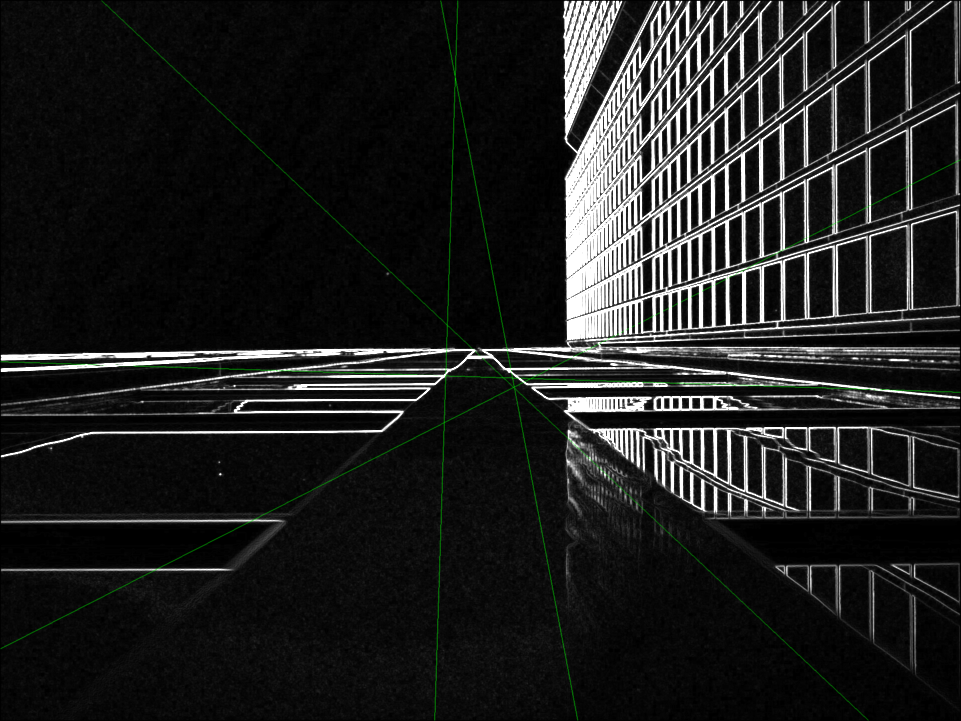

In [320]:
function plot_img_and_linear_functions(img, mn_list)
    img2 = RGB{Float32}.(copy(img))
    (h, w) = size(img)
 
    for (m, n) in mn_list
        if abs(n) < 1e16

            x1 = -w ÷ 2
            x2 = w ÷ 2
        
            y1 = floor(Int, m * x1 + n)
            y2 = floor(Int, m * x2 + n)

            (x1, y1) = rel_pos_to_abs((x1, y1), (w, h))
            (x2, y2) = rel_pos_to_abs((x2, y2), (w, h))
            draw!(img2, LineTwoPoints(Point(x1, y1), Point(x2, y2)), RGB{Float32}(0.0, 1.0, 0.0))
        end
    end
    return img2
end


plot_img_and_linear_functions(img, top_k_line_params)

(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)
(x1, y1, x2, y2) = (0, 142, 200, 148)
(x1, y1, x2, y2) = (0, 145, 200, 145)


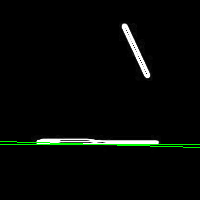

In [237]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 2, size(img))
plot_img_and_linear_functions(img, top_k_line_params)

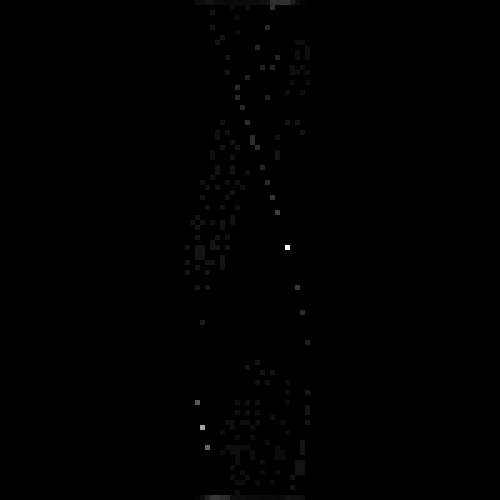

In [246]:
suppressed_acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(suppressed_acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (2.701769682087222, -50.911688126222145, 2.125108173157201, -119.5729551314761)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)
(x1, y1, x2, y2) = (0, -233, 200, 192)
(x1, y1, x2, y2) = (0, 145, 200, 145)


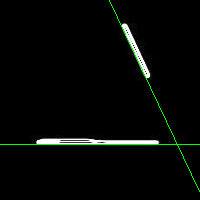

In [248]:
top_k_line_params = top_k_line_params_from_acc_matrix(suppressed_acc_matrix, 2, size(img))
plot_img_and_linear_functions(img, top_k_line_params)

## detecting the edges of some shapes

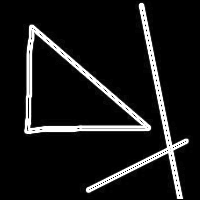

In [254]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

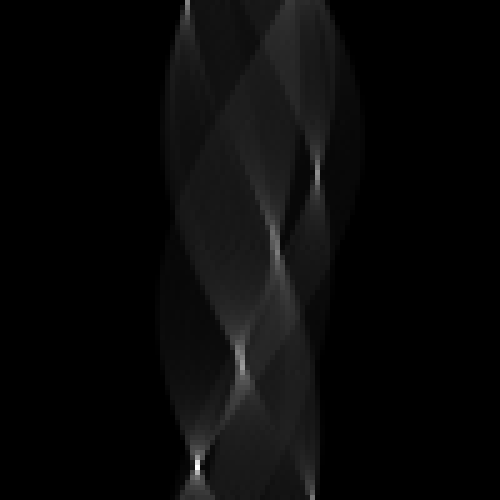

In [251]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

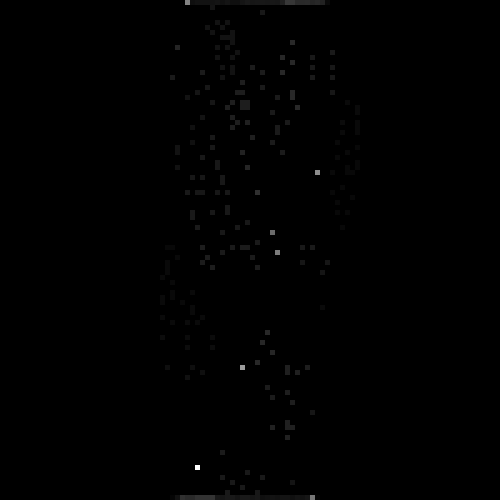

In [252]:
acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (1.6022122533307945, 33.94112561616362, 0.03142626604335113, 33.95788178093013)
(phi, r, m, n) = (0.031415926535897934, -67.88225087469928, -31.82051595377396, -2161.1146265473903)
(phi, r, m, n) = (1.0995574287564276, 79.19595961210263, -0.5095254494944289, 88.88370338729393)
(phi, r, m, n) = (2.324778563656447, -5.6568541302830795, 0.9390625058174926, -7.760078990358104)
(phi, r, m, n) = (2.9530970943744053, -56.568542375714514, 5.242183581113166, -301.8899856732246)
(x1, y1, x2, y2) = (0, 130, 200, 137)
(x1, y1, x2, y2) = (0, 1120, 200, -5244)
(x1, y1, x2, y2) = (0, 239, 200, 137)
(x1, y1, x2, y2) = (0, -2, 200, 186)
(x1, y1, x2, y2) = (0, -727, 200, 322)


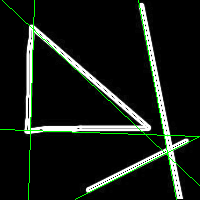

In [253]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 5, size(sobel_img))
plot_img_and_linear_functions(img, top_k_line_params)

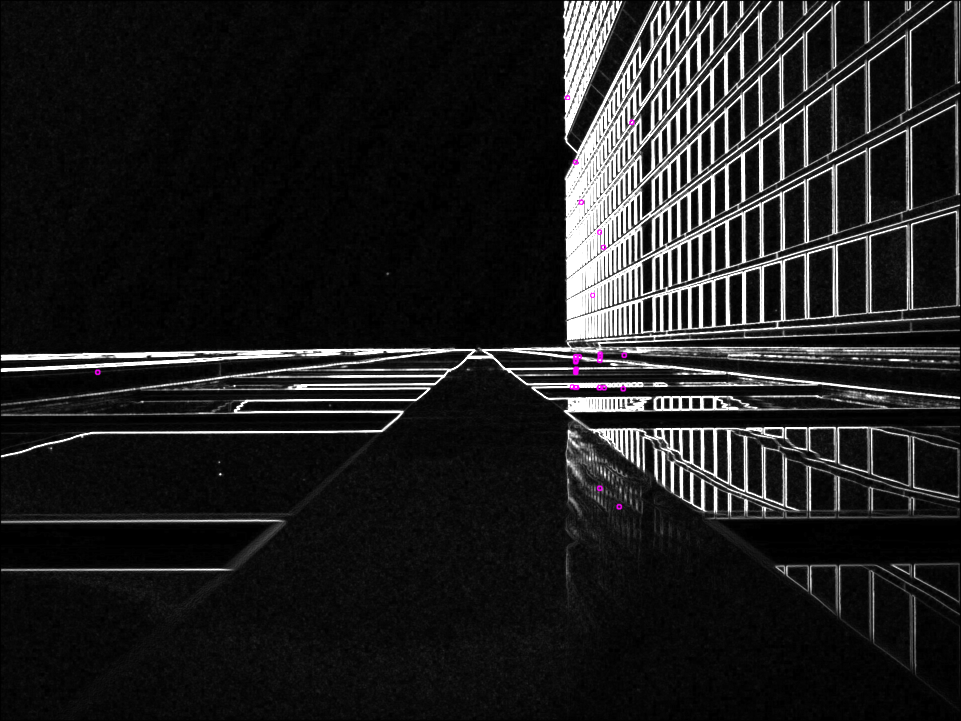

In [332]:
points = line_params_to_corner_points(top_k_line_params)

function plot_img_and_points(img, points)

    img2 = RGB{Float32}.(copy(img))
    (h, w) = size(img)

    for (x,y) in points
        try
            x = floor(Int, x)
            y = floor(Int, y)
            (x, y) = rel_pos_to_abs((x, y), (w, h))
            draw!(img2, Ellipse(CirclePointRadius(x, y, 6; thickness = 4, fill = false)), RGB{Float32}(1.0,0.0,1.0))
        catch
        end
    end
    return img2
end

plot_img_and_points(img,points)

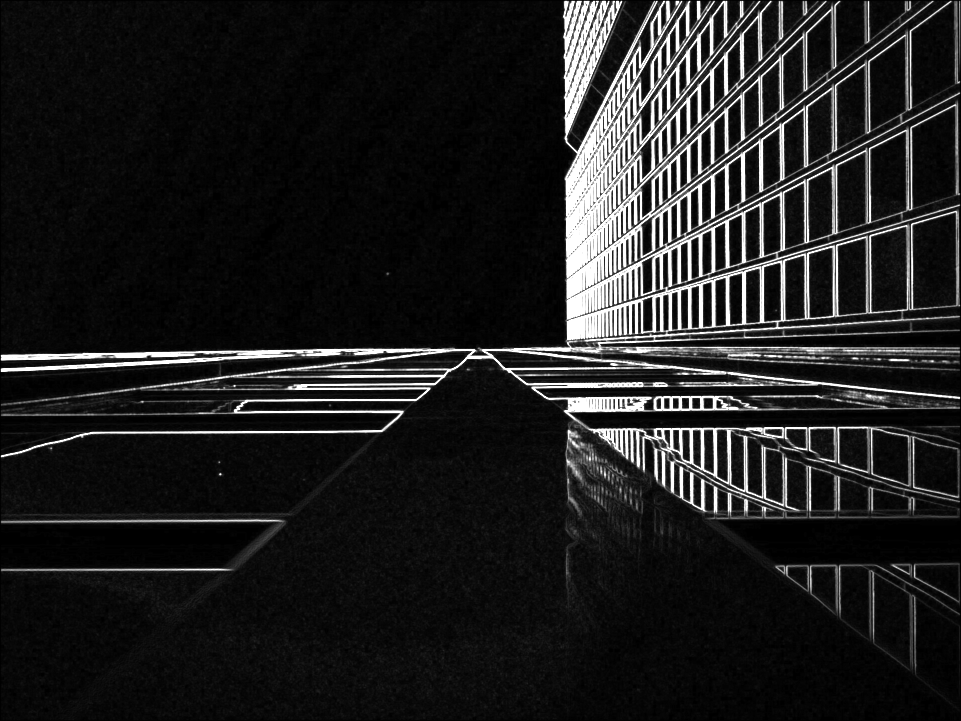

In [333]:
include("imageops.jl")
img = load("./images/input/house.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

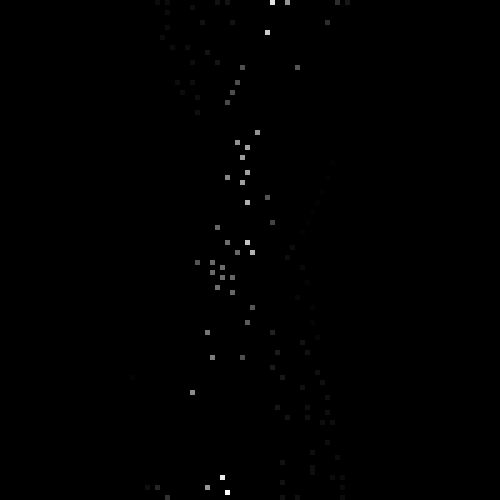

In [334]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
acc_matrix = non_maximum_suppression(acc_matrix)
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [335]:
line_params = line_params_from_acc_matrix(acc_matrix, Float32(0.4), size(img))

(phi, r, m, n) = (2.4818581963359367, -527.9999998807907, 1.289192231785067, -861.4683037727618)
(phi, r, m, n) = (2.1048670779051615, -383.9999998807907, 0.5913983513994712, -446.12669979344616)
(phi, r, m, n) = (3.078760800517997, -383.9999998807907, 15.894544843865251, -6115.572904306379)
(phi, r, m, n) = (1.6650441064025905, -335.9999998807907, 0.09452783117928211, -337.49782718421784)
(phi, r, m, n) = (1.7278759594743864, -335.9999998807907, 0.1583844403245365, -340.18828214407375)
(phi, r, m, n) = (2.261946710584651, -335.9999998807907, 0.8272719459724758, -436.07297217935417)
(phi, r, m, n) = (1.82212373908208, -287.9999998807907, 0.2567563603677266, -297.3415308451179)
(phi, r, m, n) = (1.6964600329384885, -239.9999998807907, 0.1263293784461083, -241.9075128740746)
(phi, r, m, n) = (1.7592918860102844, -239.9999998807907, 0.19076020221856696, -244.3277154444913)
(phi, r, m, n) = (3.015928947446201, -239.9999998807907, 7.915815088305808, -1914.8951403831313)
(phi, r, m, n) = (1.

28-element Vector{Tuple{Float64, Float64}}:
 (1.289192231785067, -861.4683037727618)
 (0.5913983513994712, -446.12669979344616)
 (15.894544843865251, -6115.572904306379)
 (0.09452783117928211, -337.49782718421784)
 (0.1583844403245365, -340.18828214407375)
 (0.8272719459724758, -436.07297217935417)
 (0.2567563603677266, -297.3415308451179)
 (0.1263293784461083, -241.9075128740746)
 (0.19076020221856696, -244.3277154444913)
 (7.915815088305808, -1914.8951403831313)
 (-0.47056428121225147, -212.19524698948055)
 (-0.03142626604335125, -192.09478706226358)
 (31.820515953774017, -6112.555236351581)
 ⋮
 (0.03142626604335113, -96.04739347149771)
 (-0.634619297544148, -56.84994944618369)
 (-0.43273864224742586, -52.30156137324552)
 (-0.7265425280053609, 1.4735078543422098e-7)
 (-0.5095254494944288, 1.3379171343259344e-7)
 (-0.29052685673191675, 1.2413836655267253e-7)
 (-0.03142626604335125, 1.1926814117874435e-7)
 (0.03142626604335113, 48.02369691465107)
 (-0.881618592363189, 127.9810470821387

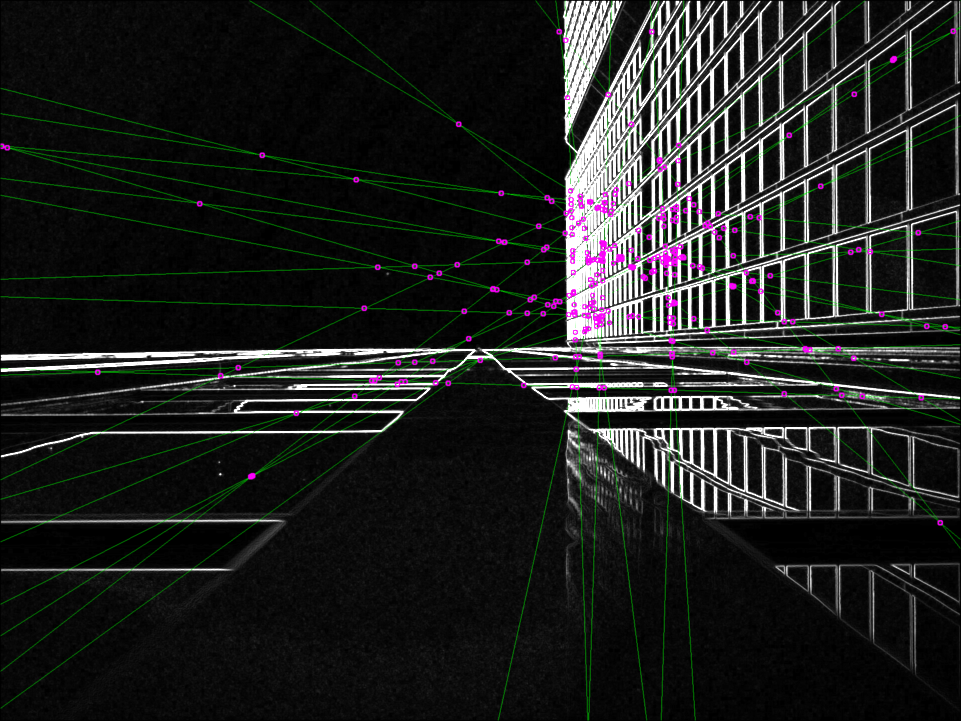

In [336]:
img2 = plot_img_and_linear_functions(img, line_params)
points = line_params_to_corner_points(line_params)
plot_img_and_points(img2, points)

these cornerpoints are obviously pointless. The lines and points are dominated by the region in the top left part.

# Corner Detection 